In [1]:
import pandas as pd
import numpy as np
import time
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import warnings
warnings.filterwarnings("ignore")

# Load file
file_path = '../dataset/data kopi.xlsx'
df = pd.read_excel(file_path)

# Seleksi hanya kolom numerik
df_numeric = df.select_dtypes(include=[np.number]).dropna()

# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

# Simpan hasil
results = []

# Eksperimen K-Means dari cluster 2 sampai 7
for k in range(2, 8):
    start_time = time.time()

    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X_scaled)

    silhouette = round(silhouette_score(X_scaled, labels), 2)
    dbi = round(davies_bouldin_score(X_scaled, labels), 2)

    end_time = time.time()
    exec_time = round(end_time - start_time, 4)

    results.append({
        'Algorithm': 'K-Means',
        'Clusters Num.': k,
        'Avg. Silhouette': silhouette,
        'Davies Bouldin Index': dbi,
        'Execution Time (s)': exec_time
    })

# Tampilkan hasil
result_df = pd.DataFrame(results)
print(result_df.to_string(index=False))


Algorithm  Clusters Num.  Avg. Silhouette  Davies Bouldin Index  Execution Time (s)
  K-Means              2             0.89                  0.13              0.2145
  K-Means              3             0.79                  1.04              0.0100
  K-Means              4             0.72                  0.56              0.0099
  K-Means              5             0.31                  0.85              0.0111
  K-Means              6             0.31                  0.90              0.0147
  K-Means              7             0.27                  1.05              0.0127


In [2]:
import pandas as pd
import numpy as np
import time
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
import warnings
warnings.filterwarnings("ignore")

# Load file
file_path = '../dataset/data kopi.xlsx'
df = pd.read_excel(file_path)

# Seleksi hanya kolom numerik
df_numeric = df.select_dtypes(include=[np.number]).dropna()

# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

# Simpan hasil
results = []

# Eksperimen dari cluster 2 sampai 7
for k in range(2, 8):
    start_time = time.time()

    agglom = AgglomerativeClustering(n_clusters=k)
    labels = agglom.fit_predict(X_scaled)

    silhouette = round(silhouette_score(X_scaled, labels), 2)
    dbi = round(davies_bouldin_score(X_scaled, labels), 2)

    end_time = time.time()
    exec_time = round(end_time - start_time, 4)

    results.append({
        'Algorithm': 'Agglomerative Clustering',
        'Clusters Num.': k,
        'Avg. Silhouette': silhouette,
        'Davies Bouldin Index': dbi,
        'Execution Time (s)': exec_time
    })

# Tampilkan hasil
result_df = pd.DataFrame(results)
print(result_df.to_string(index=False))


               Algorithm  Clusters Num.  Avg. Silhouette  Davies Bouldin Index  Execution Time (s)
Agglomerative Clustering              2             0.79                  1.01              0.0224
Agglomerative Clustering              3             0.79                  0.66              0.0078
Agglomerative Clustering              4             0.75                  0.60              0.0113
Agglomerative Clustering              5             0.67                  0.76              0.0091
Agglomerative Clustering              6             0.27                  0.96              0.0108
Agglomerative Clustering              7             0.27                  0.86              0.0138


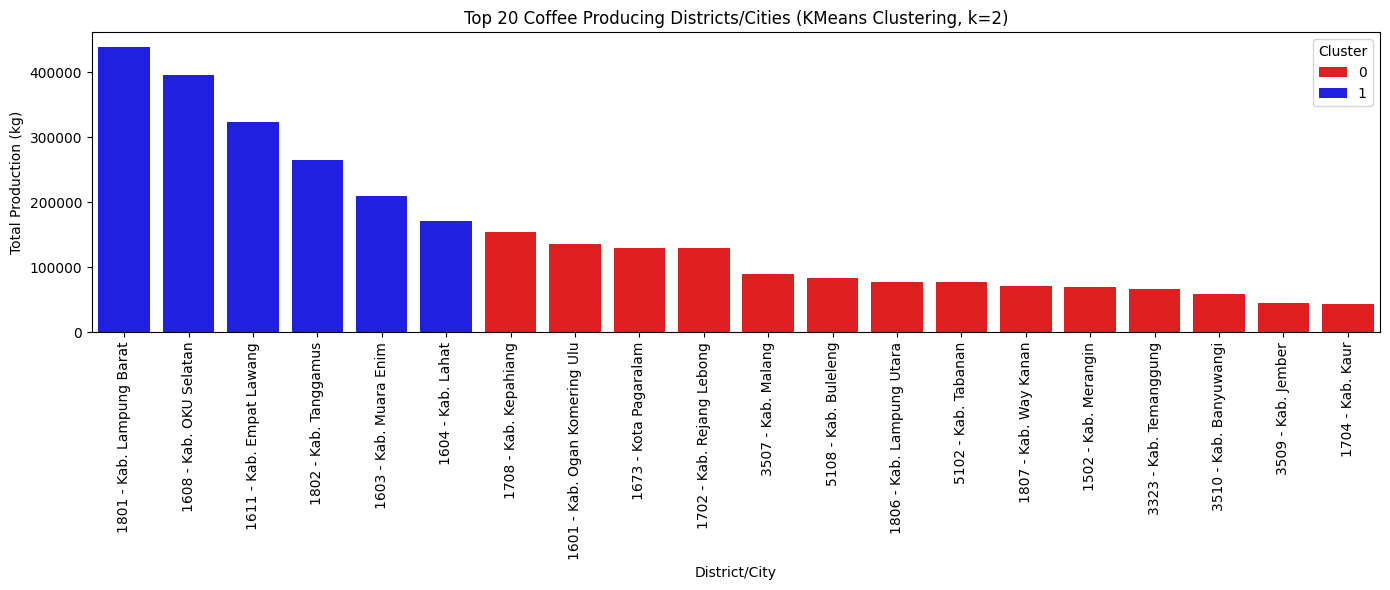

In [3]:
# Langkah 1: Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Langkah 2: Baca file Excel yang sudah tersedia
df = pd.read_excel("../dataset/data kopi.xlsx", sheet_name='Sheet1')

# Langkah 3: Hitung total produksi kopi per kabupaten/kota (2015–2022)
produksi_cols = [col for col in df.columns if "Produksi" in col]
df['Total_Produksi'] = df[produksi_cols].sum(axis=1)
df_lokasi = df[['Lokasi', 'Total_Produksi']].copy()

# Langkah 4: Clustering dengan KMeans (k=2)
kmeans = KMeans(n_clusters=2, random_state=42)
df_lokasi['Cluster'] = kmeans.fit_predict(df_lokasi[['Total_Produksi']])

# Langkah 5: Ambil 30 kabupaten/kota dengan produksi tertinggi
top30_lokasi = df_lokasi.sort_values('Total_Produksi', ascending=False).head(20)

# Langkah 6: Visualisasi
plt.figure(figsize=(14, 6))
sns.barplot(
    data=top30_lokasi,
    x='Lokasi',
    y='Total_Produksi',
    hue='Cluster',
    palette={0: 'red', 1: 'blue'}
)

plt.title("Top 20 Coffee Producing Districts/Cities (KMeans Clustering, k=2)")
plt.xlabel("District/City")
plt.ylabel("Total Production (kg)")
plt.xticks(rotation=90)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


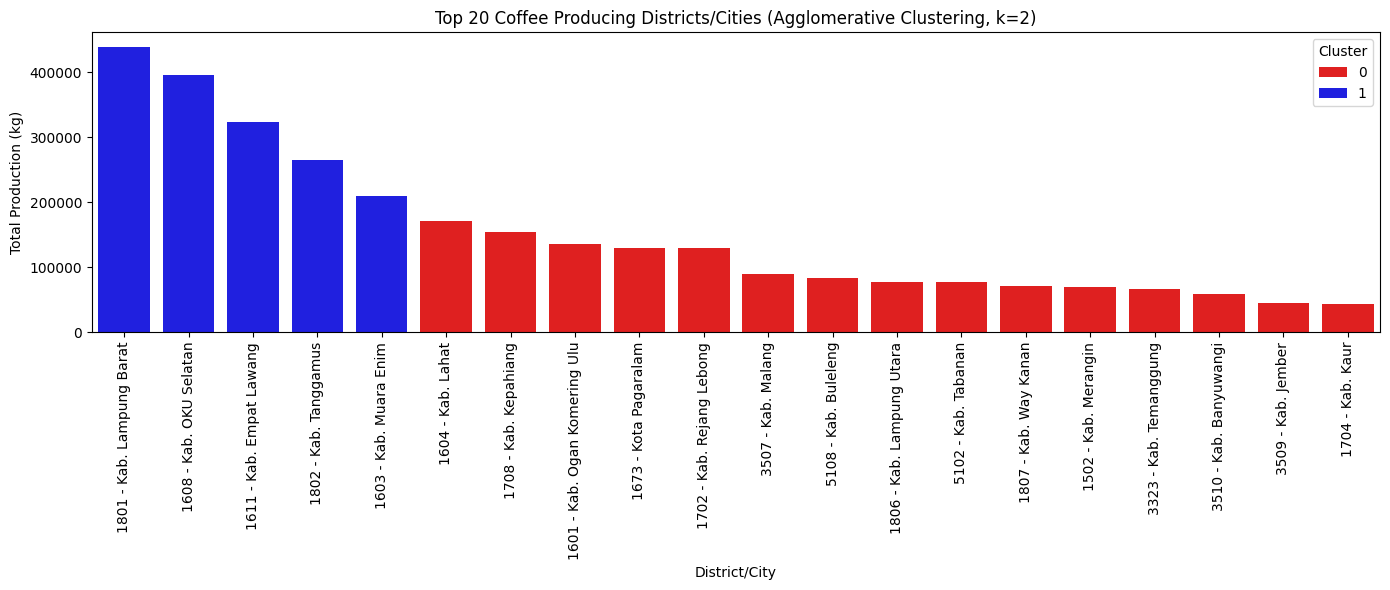

In [2]:
# Langkah 1: Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering

# Langkah 2: Baca file Excel
df = pd.read_excel("../dataset/data kopi.xlsx", sheet_name='Sheet1')

# Langkah 3: Hitung total produksi kopi per kabupaten/kota (2015–2022)
produksi_cols = [col for col in df.columns if "Produksi" in col]
df['Total_Produksi'] = df[produksi_cols].sum(axis=1)
df_lokasi = df[['Lokasi', 'Total_Produksi']].copy()

# Langkah 4: Clustering dengan Agglomerative Clustering (k=2)
agglo = AgglomerativeClustering(n_clusters=2)
df_lokasi['Cluster'] = agglo.fit_predict(df_lokasi[['Total_Produksi']])

# Langkah 5: Ambil 20 kabupaten/kota dengan produksi tertinggi
top20_lokasi = df_lokasi.sort_values('Total_Produksi', ascending=False).head(20)

# Langkah 6: Visualisasi
plt.figure(figsize=(14, 6))
sns.barplot(
    data=top20_lokasi,
    x='Lokasi',
    y='Total_Produksi',
    hue='Cluster',
    palette={0: 'red', 1: 'blue'}
)

plt.title("Top 20 Coffee Producing Districts/Cities (Agglomerative Clustering, k=2)")
plt.xlabel("District/City")
plt.ylabel("Total Production (kg)")
plt.xticks(rotation=90)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


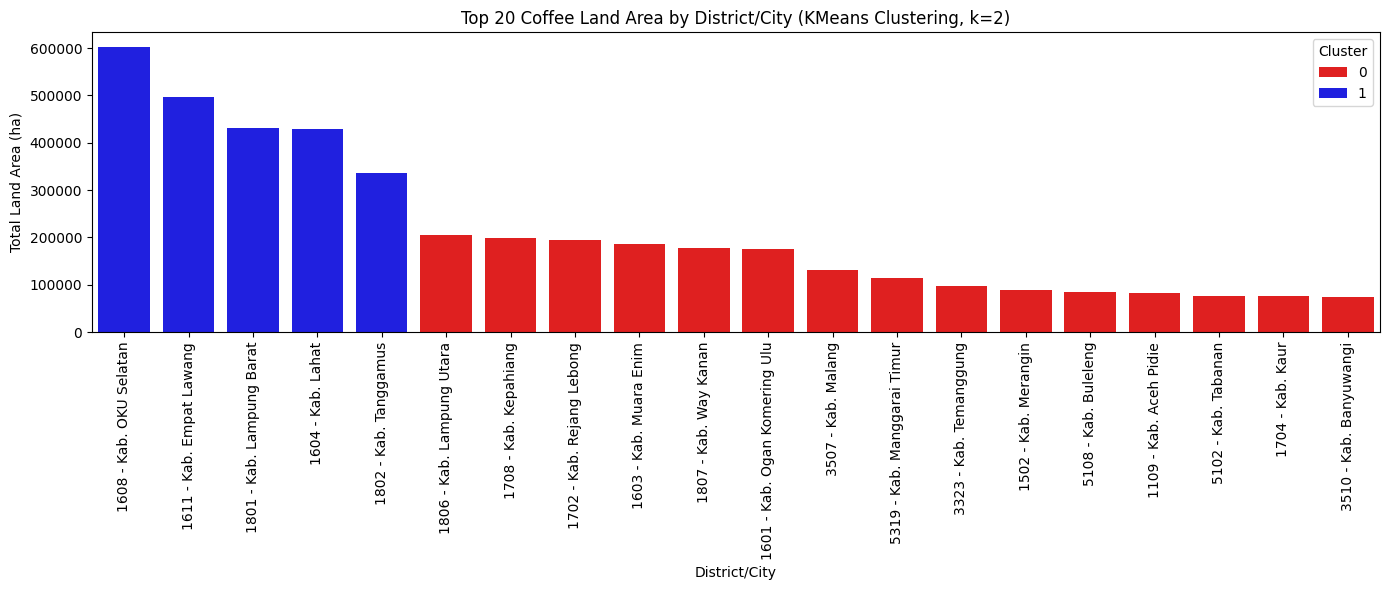

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Langkah 3: Baca data
file_path = "../dataset/data kopi.xlsx"  # Ini adalah nama file yang diupload
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Hitung total luas lahan kopi dari 2015–2022
luas_cols = [col for col in df.columns if "Luas" in col]
df['Total_Luas'] = df[luas_cols].sum(axis=1)

# Ambil lokasi dan total luas
df_luas = df[['Lokasi', 'Total_Luas']].copy()

# Clustering dengan KMeans (k=2)
kmeans = KMeans(n_clusters=2, random_state=42)
df_luas['Cluster'] = kmeans.fit_predict(df_luas[['Total_Luas']])

# Ambil 20 kabupaten/kota dengan luas lahan terbesar
top20_luas = df_luas.sort_values('Total_Luas', ascending=False).head(20)

# Visualisasi
plt.figure(figsize=(14, 6))
sns.barplot(
    data=top20_luas,
    x='Lokasi',
    y='Total_Luas',
    hue='Cluster',
    palette={0: 'red', 1: 'blue'}
)

plt.title("Top 20 Coffee Land Area by District/City (KMeans Clustering, k=2)")
plt.xlabel("District/City")
plt.ylabel("Total Land Area (ha)")
plt.xticks(rotation=90)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


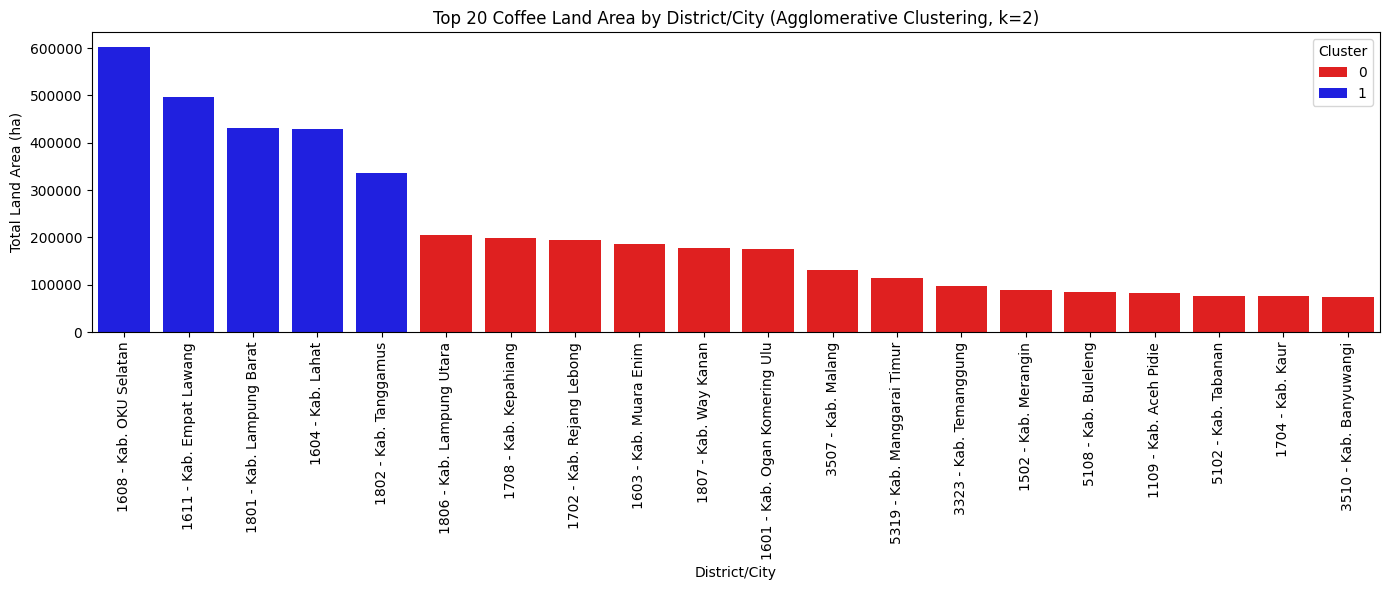

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering

# Langkah 1: Baca data
file_path = "../dataset/data kopi.xlsx"  # Nama file
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Langkah 2: Hitung total luas lahan kopi dari 2015–2022
luas_cols = [col for col in df.columns if "Luas" in col]
df['Total_Luas'] = df[luas_cols].sum(axis=1)

# Ambil lokasi dan total luas
df_luas = df[['Lokasi', 'Total_Luas']].copy()

# Langkah 3: Clustering dengan Agglomerative Clustering (k=2)
agglo = AgglomerativeClustering(n_clusters=2)
df_luas['Cluster'] = agglo.fit_predict(df_luas[['Total_Luas']])

# Langkah 4: Ambil 20 kabupaten/kota dengan luas lahan terbesar
top20_luas = df_luas.sort_values('Total_Luas', ascending=False).head(20)

# Langkah 5: Visualisasi
plt.figure(figsize=(14, 6))
sns.barplot(
    data=top20_luas,
    x='Lokasi',
    y='Total_Luas',
    hue='Cluster',
    palette={0: 'red', 1: 'blue'}
)

plt.title("Top 20 Coffee Land Area by District/City (Agglomerative Clustering, k=2)")
plt.xlabel("District/City")
plt.ylabel("Total Land Area (ha)")
plt.xticks(rotation=90)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


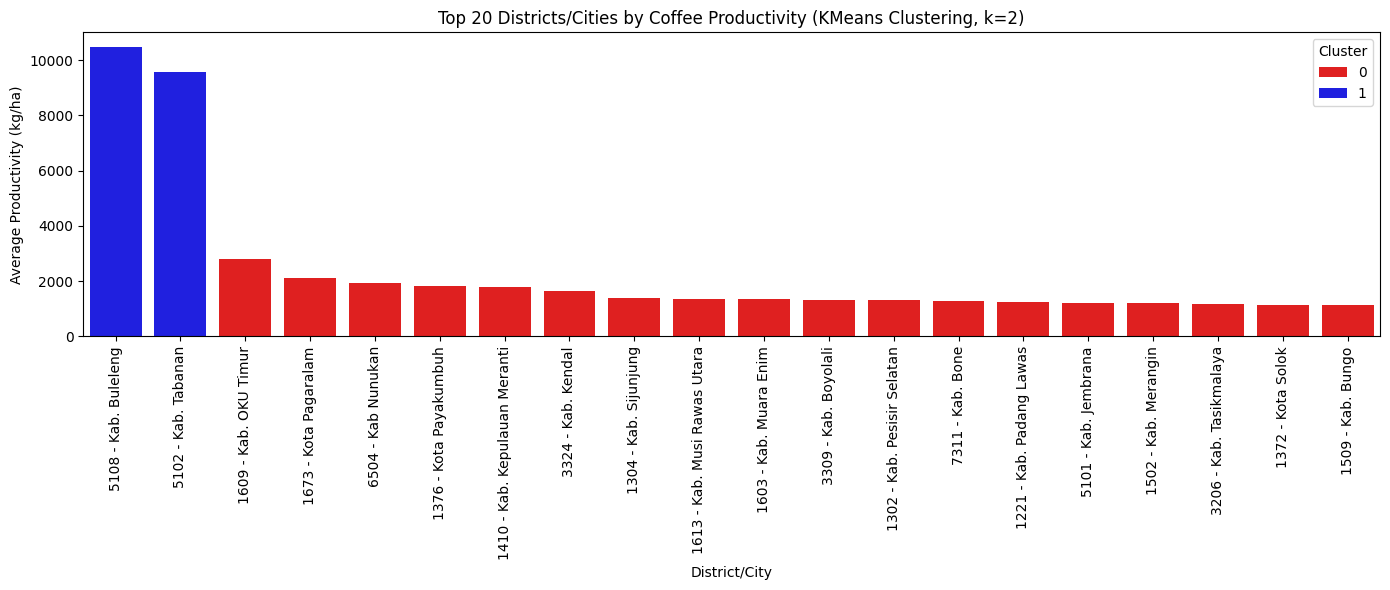

In [6]:
# Langkah 1: Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Langkah 2: Baca file Excel yang sudah tersedia
df = pd.read_excel("../dataset/data kopi.xlsx", sheet_name='Sheet1')

# Langkah 3: Hitung total atau rata-rata produktivitas kopi per kabupaten/kota (2015–2022)
produktivitas_cols = [col for col in df.columns if "Produktivitas" in col]
df['Rata2_Produktivitas'] = df[produktivitas_cols].mean(axis=1)
df_lokasi = df[['Lokasi', 'Rata2_Produktivitas']].copy()

# Langkah 4: Clustering dengan KMeans (k=2)
kmeans = KMeans(n_clusters=2, random_state=42)
df_lokasi['Cluster'] = kmeans.fit_predict(df_lokasi[['Rata2_Produktivitas']])

# Langkah 5: Ambil 20 kabupaten/kota dengan rata-rata produktivitas tertinggi
top20_lokasi = df_lokasi.sort_values('Rata2_Produktivitas', ascending=False).head(20)

# Langkah 6: Visualisasi
plt.figure(figsize=(14, 6))
sns.barplot(
    data=top20_lokasi,
    x='Lokasi',
    y='Rata2_Produktivitas',
    hue='Cluster',
    palette={0: 'red', 1: 'blue'}
)

plt.title("Top 20 Districts/Cities by Coffee Productivity (KMeans Clustering, k=2)")
plt.xlabel("District/City")
plt.ylabel("Average Productivity (kg/ha)")
plt.xticks(rotation=90)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


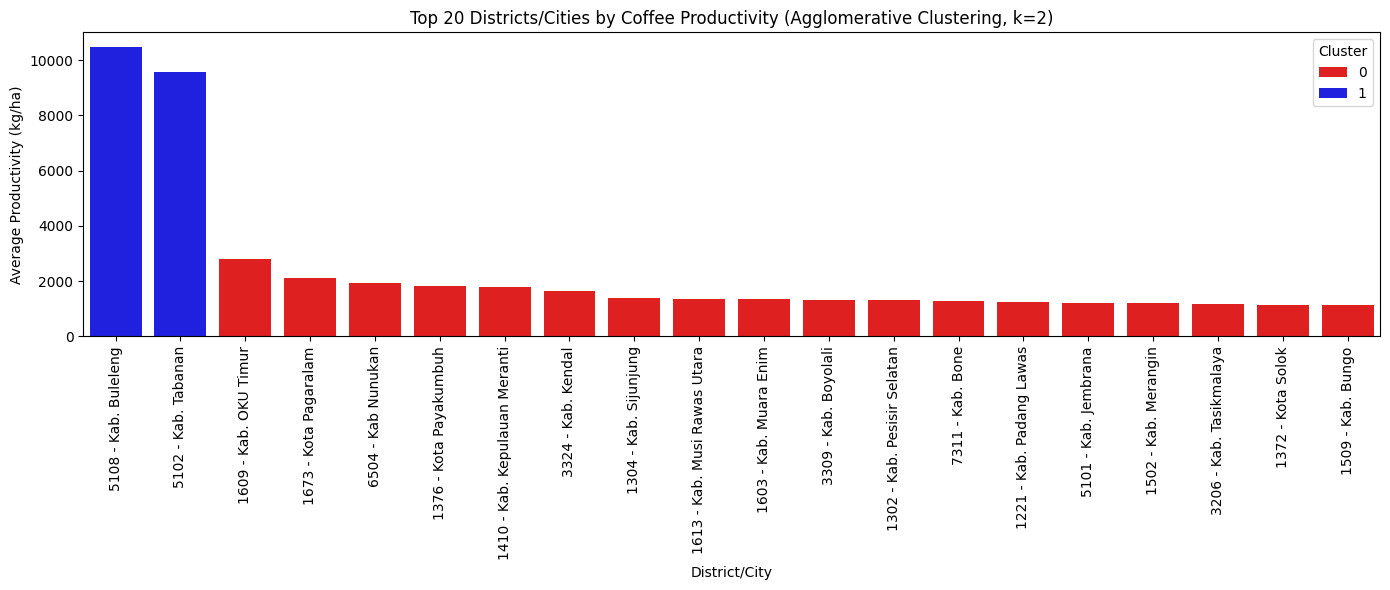

In [4]:
# Langkah 1: Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering

# Langkah 2: Baca file Excel
df = pd.read_excel("../dataset/data kopi.xlsx", sheet_name='Sheet1')

# Langkah 3: Hitung rata-rata produktivitas kopi per kabupaten/kota (2015–2022)
produktivitas_cols = [col for col in df.columns if "Produktivitas" in col]
df['Rata2_Produktivitas'] = df[produktivitas_cols].mean(axis=1)
df_lokasi = df[['Lokasi', 'Rata2_Produktivitas']].copy()

# Langkah 4: Clustering dengan Agglomerative Clustering (k=2)
agglo = AgglomerativeClustering(n_clusters=2)
df_lokasi['Cluster'] = agglo.fit_predict(df_lokasi[['Rata2_Produktivitas']])

# Langkah 5: Ambil 20 kabupaten/kota dengan produktivitas tertinggi
top20_lokasi = df_lokasi.sort_values('Rata2_Produktivitas', ascending=False).head(20)

# Langkah 6: Visualisasi
plt.figure(figsize=(14, 6))
sns.barplot(
    data=top20_lokasi,
    x='Lokasi',
    y='Rata2_Produktivitas',
    hue='Cluster',
    palette={0: 'red', 1: 'blue'}
)

plt.title("Top 20 Districts/Cities by Coffee Productivity (Agglomerative Clustering, k=2)")
plt.xlabel("District/City")
plt.ylabel("Average Productivity (kg/ha)")
plt.xticks(rotation=90)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


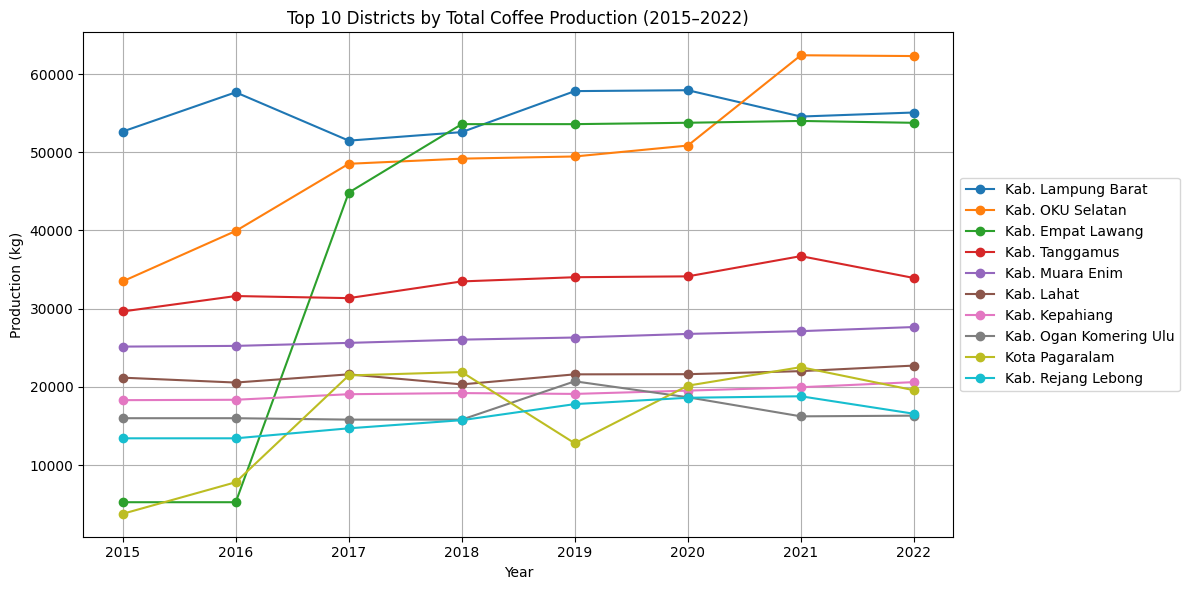

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Langkah 1: Baca data
df = pd.read_excel("../dataset/data kopi.xlsx", sheet_name='Sheet1')
df = df.rename(columns={"Lokasi": "Kabupaten"})

# Langkah 2: Identifikasi kolom produksi dan tahun
produksi_cols = [col for col in df.columns if "Produksi" in col]
tahun = [int(col.split()[-1]) for col in produksi_cols]

# Langkah 3: Hitung total produksi dan ambil 10 kabupaten teratas
df['Total_Produksi'] = df[produksi_cols].sum(axis=1)
top10_kabupaten = df.sort_values('Total_Produksi', ascending=False).head(10)

# Langkah 4: Plot grafik
plt.figure(figsize=(12, 6))
for _, row in top10_kabupaten.iterrows():
    nama_kab = row['Kabupaten'].split(' - ')[1]
    plt.plot(
        tahun,
        row[produksi_cols].values,
        marker='o',
        label=nama_kab
    )

plt.title("Top 10 Districts by Total Coffee Production (2015–2022)")
plt.xlabel("Year")
plt.ylabel("Production (kg)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()


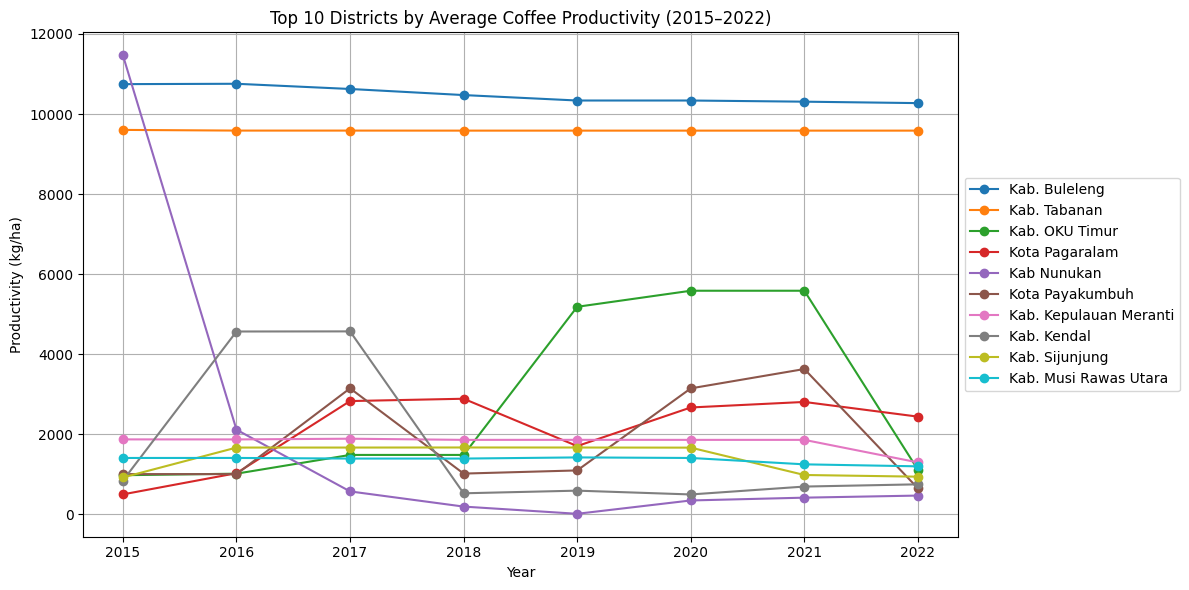

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Langkah 1: Baca data
df = pd.read_excel("../dataset/data kopi.xlsx", sheet_name='Sheet1')
df = df.rename(columns={"Lokasi": "Kabupaten"})

# Langkah 2: Identifikasi kolom produktivitas dan tahun
produktivitas_cols = [col for col in df.columns if "Produktivitas" in col]
tahun = [int(col.split()[-1]) for col in produktivitas_cols]

# Langkah 3: Hitung rata-rata produktivitas dan ambil 10 kabupaten teratas
df['Rata2_Produktivitas'] = df[produktivitas_cols].mean(axis=1)
top10_kab = df.sort_values('Rata2_Produktivitas', ascending=False).head(10)

# Langkah 4: Plot grafik
plt.figure(figsize=(12, 6))
for _, row in top10_kab.iterrows():
    nama_kab = row['Kabupaten'].split(' - ')[1]
    plt.plot(
        tahun,
        row[produktivitas_cols].values,
        marker='o',
        label=nama_kab
    )

plt.title("Top 10 Districts by Average Coffee Productivity (2015–2022)")
plt.xlabel("Year")
plt.ylabel("Productivity (kg/ha)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import folium
from geopy.geocoders import Nominatim
import time
from sklearn.cluster import KMeans


# Langkah 3: Baca data
#file_path = list(uploaded.keys())[0]
df = pd.read_excel("../dataset/data kopi.xlsx", sheet_name='Sheet1')
df = df.rename(columns={"Lokasi": "Kabupaten"})

# Langkah 4: Hitung total produksi per kabupaten (2015–2022)
produksi_cols = [col for col in df.columns if "Produksi" in col]
df['Total_Produksi'] = df[produksi_cols].sum(axis=1)

# Langkah 5: Geocoding kabupaten menggunakan OpenStreetMap (via geopy)
geolocator = Nominatim(user_agent="geo_kopi_app")
latitudes, longitudes = [], []

for lokasi in df['Kabupaten']:
    nama_kab = lokasi.split(" - ")[1] + ", Indonesia"
    try:
        location = geolocator.geocode(nama_kab)
        if location:
            latitudes.append(location.latitude)
            longitudes.append(location.longitude)
        else:
            latitudes.append(None)
            longitudes.append(None)
    except:
        latitudes.append(None)
        longitudes.append(None)
    time.sleep(1)  # jeda 1 detik untuk mencegah pemblokiran

df['Latitude'] = latitudes
df['Longitude'] = longitudes

# Langkah 6: Hapus data yang gagal geocoding
df_map = df.dropna(subset=['Latitude', 'Longitude']).copy()

# Langkah 7: Clustering berdasarkan total produksi
kmeans = KMeans(n_clusters=2, random_state=42)
df_map['Cluster'] = kmeans.fit_predict(df_map[['Total_Produksi']])

# Langkah 8: Tampilkan peta dengan folium
map_kopi = folium.Map(location=[-2.5, 117], zoom_start=5, tiles='cartodbpositron')

for _, row in df_map.iterrows():
    warna = 'red' if row['Cluster'] == 0 else 'blue'
    label = 'Low' if row['Cluster'] == 0 else 'High'
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color=warna,
        fill=True,
        fill_opacity=0.7,
        popup=f"{row['Kabupaten'].split(' - ')[1]}<br>Cluster: {label}<br>Total Production: {int(row['Total_Produksi']):,} kg"
    ).add_to(map_kopi)

map_kopi

In [5]:
import pandas as pd
import folium
from sklearn.cluster import KMeans

# Langkah 1: Baca data
df = pd.read_excel("../dataset/data kopi.xlsx", sheet_name='Sheet1')
df = df.rename(columns={"Lokasi": "Kabupaten"})  # sesuaikan kolom nama kabupaten

# Langkah 2: Hitung total produksi kopi 2015–2022
produksi_cols = [col for col in df.columns if "Produksi" in col]
df['Total_Produksi'] = df[produksi_cols].sum(axis=1)

# Langkah 3: Filter data dengan koordinat lengkap
df_map = df.dropna(subset=['Latitude', 'Longitude']).copy()

# Langkah 4: Clustering KMeans (k=2)
kmeans = KMeans(n_clusters=2, random_state=42)
df_map['Cluster'] = kmeans.fit_predict(df_map[['Total_Produksi']])

# Langkah 5: Peta interaktif
map_kopi = folium.Map(location=[-2.5, 117], zoom_start=5, tiles='cartodbpositron')

for _, row in df_map.iterrows():
    warna = 'red' if row['Cluster'] == 0 else 'blue'
    label = 'Low' if row['Cluster'] == 0 else 'High'
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=6,
        color=warna,
        fill=True,
        fill_opacity=0.9,
        popup=folium.Popup(
            f"<b>{row['Kabupaten']}</b><br>Cluster: {label}<br>Total Production: {int(row['Total_Produksi']):,} kg",
            max_width=250
        )
    ).add_to(map_kopi)

# Zoom otomatis ke semua titik
map_kopi.fit_bounds(map_kopi.get_bounds())

# Tampilkan peta
map_kopi
